# ROC and AUC, Clearly Explained!

In this notebook, we will explore and explain the concepts of Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC). These are evaluation metrics used in binary classification tasks, and provide a way to compare different models and find the optimal decision threshold.

We will be using the example of classifying mice as obese or not obese based on their weights.

Please note that this notebook assumes a basic understanding of the confusion matrix, sensitivity and specificity, and logistic regression. If you're not familiar with these concepts, it's recommended to brush up on them before proceeding with this notebook.

Let's get started!

![image.png](https://miro.medium.com/max/1400/1*pk05QGzoWhCgRiiFbz-oKQ.png)

## Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Data Preparation

In this example, we're synthesizing a binary classification dataset where we have two classes, `obese` and `not obese`. Each class is represented by a feature, `weight`.

Let's generate this dataset using the `make_classification` function from sklearn.

In [2]:
# Generate a binary classification dataset.
X, y = make_classification(n_samples=1000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=4)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression Model

We're going to fit a logistic regression model to this data. The model will output the probability that a mouse is obese given its weight.

In [3]:
# Initialize the model
clf = LogisticRegression()

# Fit the model
clf.fit(X_train, y_train)

# Get the predicted probabilities
y_score = clf.predict_proba(X_test)

## ROC Curve

We can plot the ROC curve to visualize the performance of our model across all possible classification thresholds.

The ROC curve is a plot of the true positive rate (sensitivity) against the false positive rate (1-specificity) for every possible classification threshold. The true positive rate is the proportion of actual positive cases that were correctly identified, and the false positive rate is the proportion of actual negative cases that were incorrectly identified as positive.

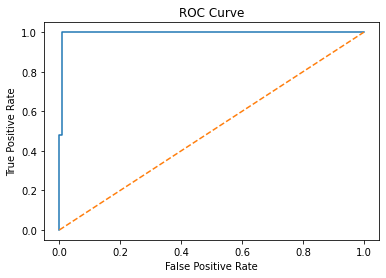

In [4]:
# Calculate the ROC curve points
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])

# Create a plot
plt.plot(fpr, tpr)

# Draw the line of no discrimination
plt.plot([0, 1], [0, 1], linestyle='--')

# Add labels and title
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the plot
plt.show()

The ROC curve allows us to compare different classification models and thresholds based on their performance. The closer the curve is to the top left corner, the better the model is. A model with a curve that's under the red diagonal line is no better than random guessing.

However, while the ROC curve is a useful tool for visualizing the model's performance, it doesn't give us a quantitative metric that we can use to compare models. That's where AUC comes in.

## AUC

AUC stands for "Area under the ROC Curve". It provides an aggregate measure of performance across all possible classification thresholds. The AUC can be interpreted as the probability that the model ranks a random positive example more highly than a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

1. AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
2. AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

1. Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.
2. Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.

In [5]:
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ', roc_auc)

AUC:  0.9950822962665596


The AUC of our model is close to 1, indicating that it has a good measure of separability and is able to distinguish between the positive and negative classes.

In conclusion, ROC and AUC are valuable evaluation metrics for binary classification problems. They provide a way to compare different models and thresholds in a way that balances the trade-off between the true positive rate and false positive rate, and are invariant to the scale and classification threshold. However, they should be used with consideration for the specific requirements and constraints of the problem at hand.